<a href="https://colab.research.google.com/github/gittimos/covid19tests/blob/master/second_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

## Cases

See "Daten zum Download"
https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/nCoV_node.html

Dashboard-Daten

## Tests

### RKI

#### up to week 31
p .31
https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Testzahl.html[link text](https://) 

#### up to week 33
p. 12
https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Situationsberichte/2020-08-19-de.pdf?__blob=publicationFile

### weekly reports

https://ars.rki.de/Content/COVID19/Main.aspx

### Ourworldindata

https://ourworldindata.org/coronavirus-testing

Read this: https://covid.ourworldindata.org/data/owid-covid-data.csv

### Statista

https://de.statista.com/statistik/daten/studie/1107749/umfrage/labortest-fuer-das-coronavirus-covid-19-in-deutschland/

### CSSE

https://github.com/CSSEGISandData/COVID-19

In [2]:
import pandas as pd
import numpy as np

## Case data from RKI

In [3]:
# Load data from RKI
url = 'https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv'
rki_data = pd.read_csv(url)

In [4]:
rki_data.columns

Index(['ObjectId', 'IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe',
       'Geschlecht', 'AnzahlFall', 'AnzahlTodesfall', 'Meldedatum',
       'IdLandkreis', 'Datenstand', 'NeuerFall', 'NeuerTodesfall', 'Refdatum',
       'NeuGenesen', 'AnzahlGenesen', 'IstErkrankungsbeginn', 'Altersgruppe2'],
      dtype='object')

In [5]:
rki_date = 'Refdatum' # Refdatum or Meldedatum
rki_data_ger = rki_data[[rki_date,'AnzahlFall']].groupby([rki_date]).sum()
# rki_data_ger_df.head()

In [6]:
rki_data_ger['week'] = pd.to_datetime(rki_data_ger.index.to_series()).dt.week
# rki_data_ger_df.head()

In [8]:
rki_data_ger_week = rki_data_ger.groupby(['week']).sum()
rki_data_ger_cum_week = rki_data_ger_week.cumsum()
#rki_data_ger_cum_week.head()

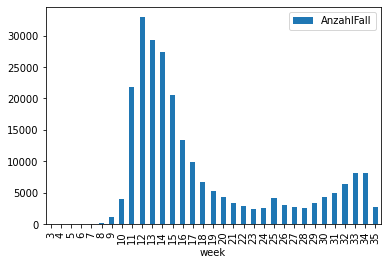

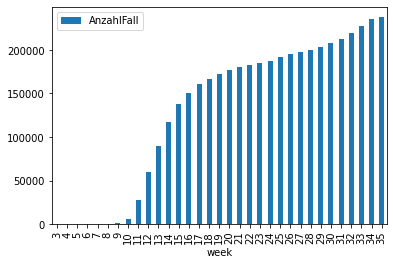

In [10]:
rki_data_ger_week.plot.bar()
rki_data_ger_cum_week.plot.bar()

## Tests

Loading tests conducted per week based on data published in "Täglicher Lagebericht des RKI
zur Coronavirus-Krankheit-2019
(COVID-19)"

In [23]:
# store data on Github or Google Drive
# load test data
url = 'https://raw.githubusercontent.com/gittimos/covid19tests/master/RKI_test_data_week33.csv'
rki_test_data = pd.read_csv(url)
rki_test_data

,KW 2020,Anzahl Testungen,Positiv getestet,Positivenrate (%),Anzahl übermittelnde Labore
0,Bis KW 10,124716,3892,3.12,90.0
1,11,127457,7582,5.95,114.0
2,12,348619,23820,6.83,152.0
3,13,361515,31414,8.69,151.0
4,14,408348,36885,9.03,154.0
5,15,380197,30791,8.10,164.0
6,16,331902,22082,6.65,168.0
7,17,363890,18083,4.97,178.0
8,18,326788,12608,3.86,175.0
9,19,403875,10755,2.66,182.0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Case numbers per test case


Dividing the case numbers shows the dynamics of infection ("Positivenrate").

Für den Zeitraum 09.08. – 15.08.2020 wurden uns von den teilnehmenden Zentren insgesamt 79.392
Teste berichtet, davon waren 1.236 positiv (1,56%). Hiervon erfolgten 43.810 Testungen an den
genannten Flughäfen, davon waren 478 positiv (1,09%). An den drei Autobahnraststätten wurden
32.011 Personen getestet, hier waren 709 Personen positiv (2,21%). An den zwei Bahnhöfen wurden
3.571 Testungen durchgeführt, davon waren 49 positiv (1,37%).

https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Situationsberichte/2020-08-19-de.pdf?__blob=publicationFile (p. 12)

Die laborbasierte SARS-CoV-2-Surveillance beruht auf der freiwilligen Teilnahme von Laboren, die diese Diagnostik durchführen. Es handelt sich damit um Daten aus einer Stichprobe von Laboren, nicht um eine Vollerhebung aller Testungen in Deutschland. Die freiwillige Teilnahme an der laborbasierten SARS-CoV-2-Surveillance ersetzt nicht die Meldepflicht nach IfSG.

https://ars.rki.de/Content/COVID19/Main.aspx

## Decline and rise

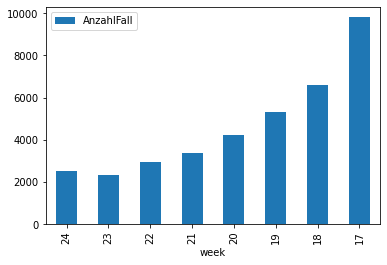

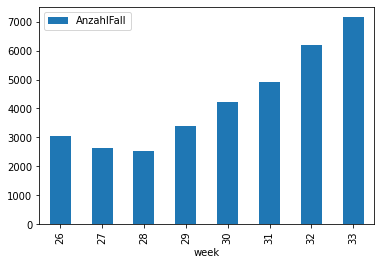

In [88]:
# compare development
rki_data_ger_week_1 = rki_data_ger_week_df.loc[:24,:]
rki_data_ger_week_2 = rki_data_ger_week_df.loc[26:,:]
rki_data_ger_week_2
rki_data_ger_week_1 = rki_data_ger_week_1.iloc[::-1]

rki_data_ger_week_1.iloc[:8].plot.bar()
rki_data_ger_week_2.iloc[:8].plot.bar()

## Data from Ourworldindata


In [17]:
# Load data from Ourworldindata
#url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
test_data_df = pd.read_csv(url)

In [18]:
test_data_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [19]:
test_data_df 
test_data_df_ger = test_data_df.loc[test_data_df["location"] == "Germany"]

In [20]:
test_data_df_ger[['new_tests_per_thousand']]

,new_tests_per_thousand
8951,NaN
8952,NaN
8953,NaN
8954,NaN
8955,NaN
...,...
9180,NaN
9181,NaN
9182,NaN
9183,NaN


In [49]:
test_data_df_ger[['date','new_cases','total_cases']]

,date,new_cases,total_cases
8951,2019-12-31,0.0,0.0
8952,2020-01-01,0.0,0.0
8953,2020-01-02,0.0,0.0
8954,2020-01-03,0.0,0.0
8955,2020-01-04,0.0,0.0
...,...,...,...
9180,2020-08-16,718.0,224233.0
9181,2020-08-17,481.0,224714.0
9182,2020-08-18,1431.0,226145.0
9183,2020-08-19,769.0,226914.0


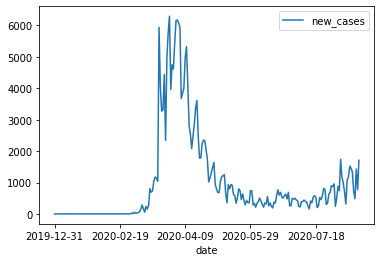

In [48]:
test_data_df_ger.plot(x = 'date', y = 'new_cases')
